In [215]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def predict_perc(x, w):
    pred = np.sign(np.dot(w, x))
    return pred

def get_incorrect_preds(data, preds):
    idx = tuple(np.where(data[0] != preds)[0].T)
    incorrect_preds = data[:, idx]
    return incorrect_preds

def update_preds(data, incorrect_preds, w):
    ip_len = np.shape(incorrect_preds)[1]
    while ip_len > 0:
        ip_samp = incorrect_preds[:, (np.random.randint(low=0, high=ip_len, size=1)[0])]
        w += (ip_samp[1:4] * ip_samp[0])
        preds = np.apply_along_axis(predict_perc, 0, data[1:4], w)
        incorrect_preds = get_incorrect_preds(data, preds)
        ip_len = np.shape(incorrect_preds)[1]
    return {
        'w':w,
        'slope':-w[0] / w[1],
        'intercept':-w[2] / w[1],
        'predictions':preds
    }

def perceptron(data, verbose=False):
    w = np.random.rand(3)
    preds = np.apply_along_axis(predict_perc, 0, data[1:4], w)
    incorrect_preds = get_incorrect_preds(data, preds)
    p = update_preds(data, incorrect_preds, w)
    if verbose is True:
        print(f"The calculation has a slope of {p['slope']} and intercept at {p['intercept']}")
    return p

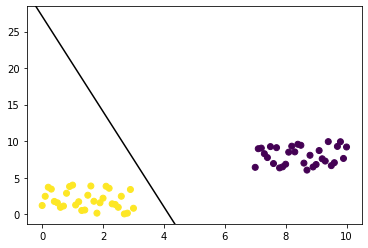

In [236]:
# Test data
dt = np.array([
    np.array([1] * 31 + [-1] * 31),
    np.concatenate((np.arange(0, 3.1, .1), np.arange(7, 10.1, .1))),
    np.concatenate((np.random.uniform(low=0, high=4, size=31), np.random.uniform(low=6, high=10, size=31))),
    np.array([1]*62)
    ])

out = perceptron(dt)

fig, ax = plt.subplots()
ax.scatter(x=dt[1], y=dt[2], c=dt[0])
ax.axline((0, out['intercept']), slope=out['slope'], color='black')
plt.show()